In [ ]:
!pip install numpy pandas seaborn


In [ ]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [ ]:
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
df = pd.read_csv(url)

df.head()


,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


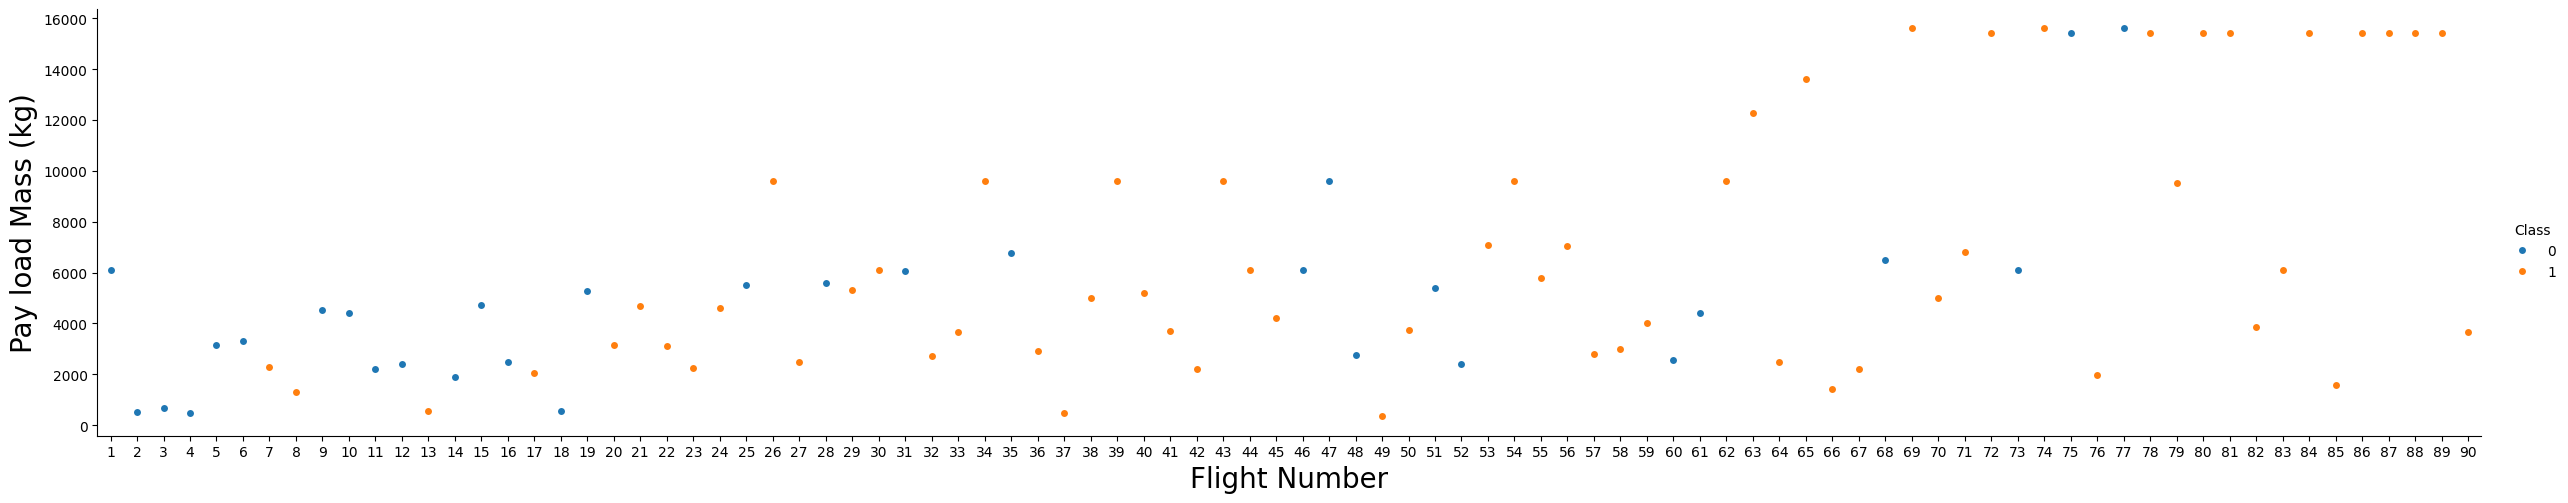

In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

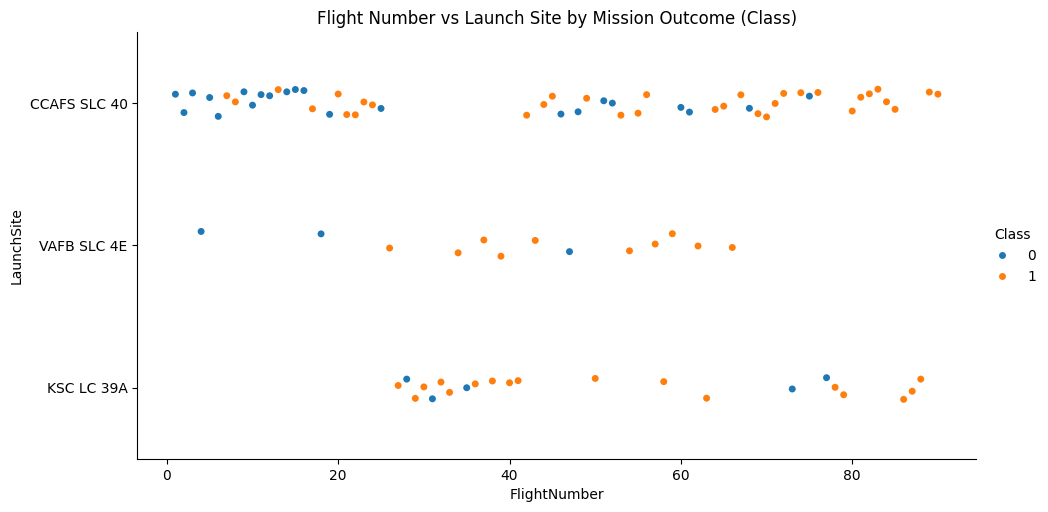

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x="FlightNumber",
    y="LaunchSite",
    hue="Class",         # Usa mayúscula inicial como aparece en tu DataFrame
    data=df,
    kind="strip",        # Usa "swarm" si quieres evitar que se solapen
    height=5,
    aspect=2
)
plt.title("Flight Number vs Launch Site by Mission Outcome (Class)")
plt.show()



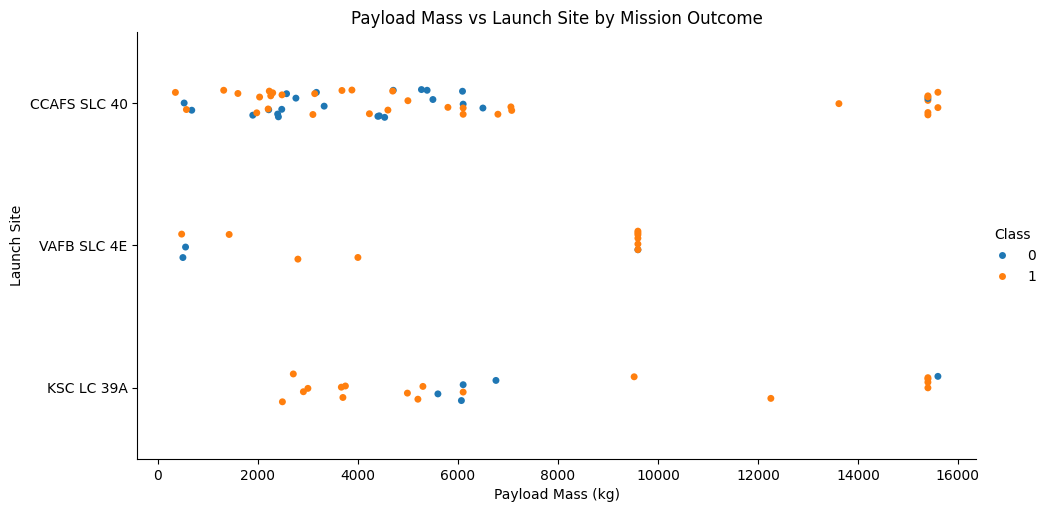

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x="PayloadMass",       # Eje X: carga útil
    y="LaunchSite",        # Eje Y: sitio de lanzamiento
    hue="Class",           # Colores: éxito (1) o fallo (0)
    data=df,
    kind="strip",          # Alternativamente, usa "swarm"
    height=5,
    aspect=2
)
plt.title("Payload Mass vs Launch Site by Mission Outcome")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Launch Site")
plt.show()


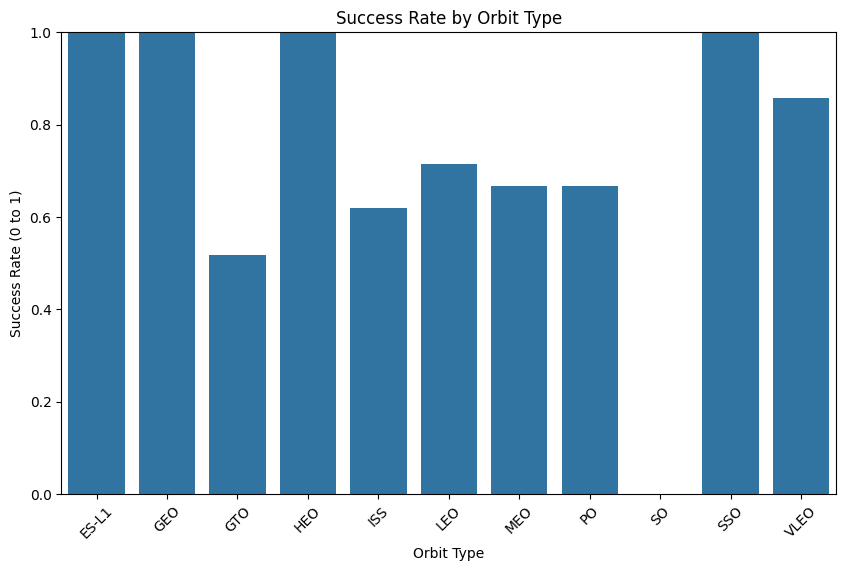

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por tipo de órbita y calcular tasa de éxito promedio
success_rate_by_orbit = df.groupby('Orbit')['Class'].mean().reset_index()

# Graficar
plt.figure(figsize=(10, 6))
sns.barplot(data=success_rate_by_orbit, x='Orbit', y='Class')
plt.title("Success Rate by Orbit Type")
plt.ylabel("Success Rate (0 to 1)")
plt.xlabel("Orbit Type")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()



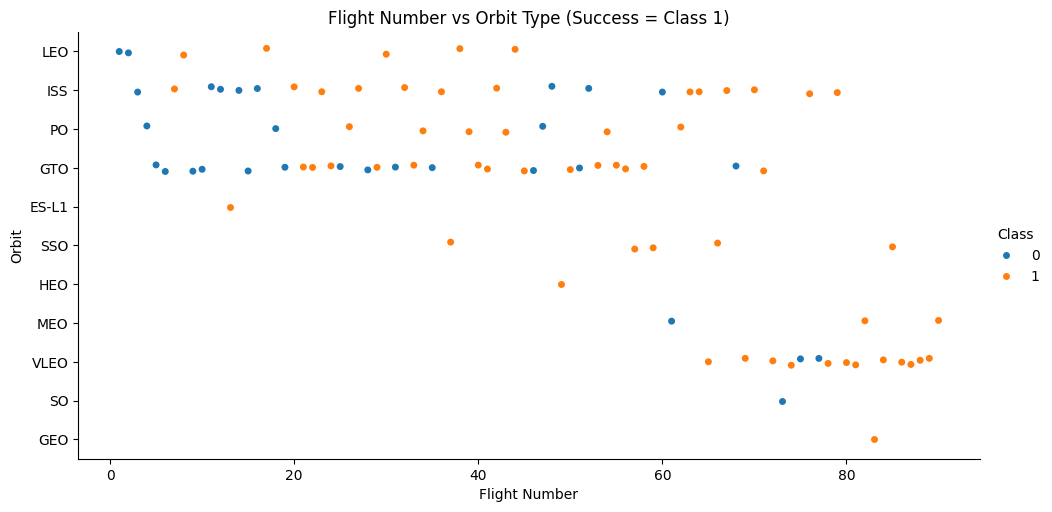

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x="FlightNumber",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",   # También puedes probar "swarm" si hay muchos puntos
    height=5,
    aspect=2
)
plt.title("Flight Number vs Orbit Type (Success = Class 1)")
plt.xlabel("Flight Number")
plt.ylabel("Orbit")
plt.show()


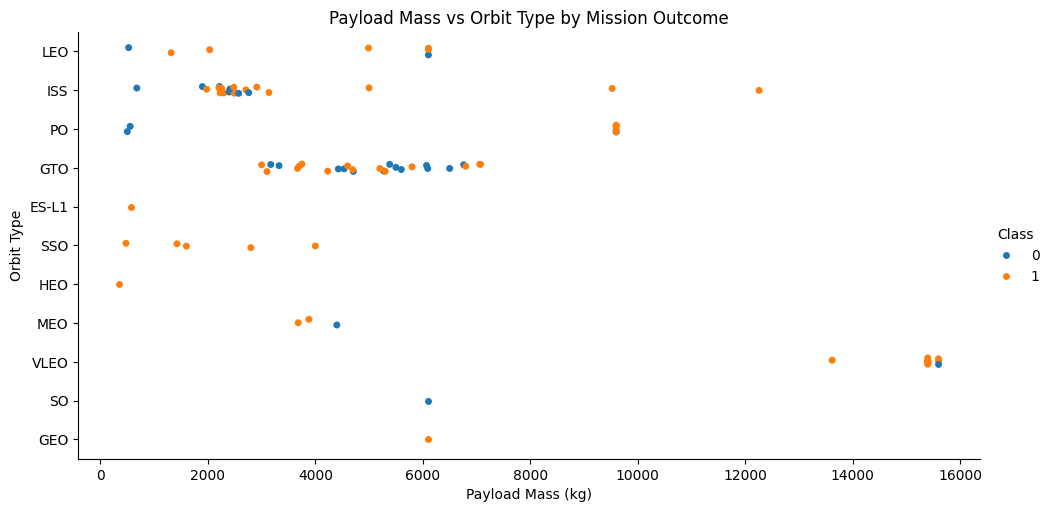

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(
    x="PayloadMass",
    y="Orbit",
    hue="Class",
    data=df,
    kind="strip",   # Alternativamente, "swarm" para mejor separación
    height=5,
    aspect=2
)
plt.title("Payload Mass vs Orbit Type by Mission Outcome")
plt.xlabel("Payload Mass (kg)")
plt.ylabel("Orbit Type")
plt.show()


In [ ]:
# A function to Extract years from the date
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
df['date'] = year
df['Year'] = year
success_rate_by_year = df.groupby('Year')['Class'].mean().reset_index()


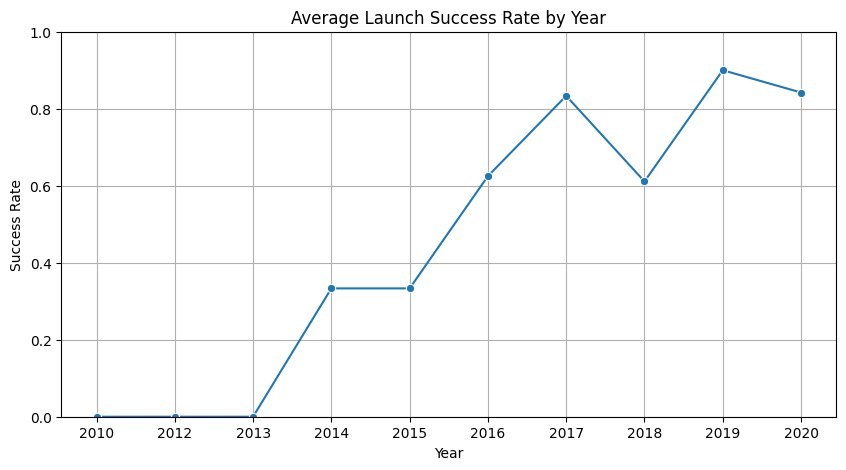

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=success_rate_by_year, x='Year', y='Class', marker='o')
plt.title("Average Launch Success Rate by Year")
plt.xlabel("Year")
plt.ylabel("Success Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()



In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [ ]:
import pandas as pd

# Lista de columnas categóricas a codificar
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Aplicar OneHotEncoding a esas columnas
features_one_hot = pd.get_dummies(features, columns=categorical_cols)

# Mostrar primeras filas del DataFrame resultante
features_one_hot.head()


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Convertir todas las columnas a float64
features_one_hot = features_one_hot.astype('float64')

# Exportar a CSV
features_one_hot.to_csv('dataset_part_3.csv', index=False)
